In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
#EDA

#load the spectograms dataset
#path1 = '../Data/images_original/' for vscode enviroment
path1 = '/content/drive/MyDrive/GTZAN/Data/images_original'
subfolders = os.listdir(path1)
print(subfolders)
subfolders.remove('.DS_Store')
data = []

music_genre = {
    'pop' : 1,
    'metal' : 2,
    'disco' : 3,
    'blues' : 4,
    'reggae' : 5,
    'classical' : 6,
    'rock' : 7,
    'hiphop' : 8,
    'country' : 9,
    'jazz' : 10
}

#obtain the genre value from the folder name
def get_genre(folder_name):
    return music_genre[folder_name]

def get_genre_from_value(genre_value):
    for genre, value in music_genre.items():
        if value == genre_value:
            return genre
    return None  # Return None if the value is not found

for folder in subfolders:
    path2 = os.path.join(path1,folder)
    print(path2)
    files = os.listdir(path2)
    #print(files)
    for file in files:
        img_path = os.path.join(path2,file)
        #print(img_path)
        #print('Image path: ',img_path)
        #Open the image file
        img = Image.open(img_path)
        # Convert the image to RGB if it has an alpha channel (transparency)
        if img.mode == 'RGBA':
            img = img.convert('RGB')
        #display(img)
        #print(img)
        #converting an image to an ndarray
        img = np.array(img)
        genre = get_genre(folder)
        data.append({'image':img,'genre':genre})

    # print(subpath)
    # img = cv2.imread(subpath)
    # cv2.imshow('image',img)
    # cv2.waitkey(0)
    # cv2.destroyAllWindows()



['.DS_Store', 'classical', 'hiphop', 'reggae', 'country', 'jazz', 'rock', 'disco', 'blues', 'metal', 'pop']
/content/drive/MyDrive/GTZAN/Data/images_original/classical
/content/drive/MyDrive/GTZAN/Data/images_original/hiphop
/content/drive/MyDrive/GTZAN/Data/images_original/reggae
/content/drive/MyDrive/GTZAN/Data/images_original/country
/content/drive/MyDrive/GTZAN/Data/images_original/jazz
/content/drive/MyDrive/GTZAN/Data/images_original/rock
/content/drive/MyDrive/GTZAN/Data/images_original/disco
/content/drive/MyDrive/GTZAN/Data/images_original/blues
/content/drive/MyDrive/GTZAN/Data/images_original/metal
/content/drive/MyDrive/GTZAN/Data/images_original/pop


In [ ]:
# dataset has been loaded and now i want to display random images from it
# We have performed EDA
for i in range(len(music_genre)):
    index = random.randint(0, len(data))
    img = data[index]['image']
    genre_value = data[index]['genre']
    genre_key = get_genre_from_value(genre_value)
    #print("Music Genre: ",genre_key)
    plt.imshow(img)
    plt.axis('off')
    plt.title(genre_key)
    plt.show()
    #display(img)
    #print("Music Genre: ",data[0]['genre'])



In [5]:
print(type(data[0]['genre']))

<class 'int'>


In [ ]:
# # Specify the file name for the CSV
# file_name = 'data.csv'
# headers = ['image', 'genre']

# # Write data to the CSV file
# with open(file_name, 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=headers)
#     writer.writeheader()  # Write header row with column names
#     for item in data:
#         writer.writerow(item)

# print(f"Data has been saved to '{file_name}'")

Data has been saved to 'data.csv'


In [3]:
X = np.array([item['image'] for item in data])#images in numpy.ndarray form
y = np.array([item['genre'] for item in data])#labels in int form

# Print shapes to verify
print("X shape:", X.shape)# (999, 288, 432, 3)
print("y shape:", y.shape)# (999,)


X shape: (999, 288, 432, 3)
y shape: (999,)


In [4]:
from sklearn.model_selection import train_test_split

# Assuming you have X (images) and y (genres) arrays

# Splitting the data into a temporary train and test set (85% - 15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Calculating the validation set size based on the total number of samples
validation_ratio = 0.10
validation_size = int((len(X_temp) * validation_ratio) / (1 - 0.15))  # Adjusted based on the remaining 85%

# Further splitting the temporary train set into train and validation sets (75% - 10%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=validation_size, random_state=42)

# Printing the shapes to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (750, 288, 432, 3)
X_val shape: (99, 288, 432, 3)
X_test shape: (150, 288, 432, 3)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

image_height = 288
image_width = 432
num_channels = 3

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block with max pooling
model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block with max pooling
model.add(Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block with max pooling
model.add(Conv2D(filters=256, kernel_size=(2, 2), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth convolutional block with max pooling
model.add(Conv2D(filters=512, kernel_size=(2, 2), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into the fully connected layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(units=512, activation='relu'))

# Output layer with softmax activation for classification
model.add(Dense(units=11, activation='softmax'))  # num_classes should be defined based on your problem

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 287, 431, 32)      416       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 143, 215, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 142, 214, 64)      8256      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 71, 107, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 70, 106, 128)      32896     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 53, 128)      

In [ ]:
# Assuming you have X_train, y_train, X_val, y_val, X_test, y_test containing your data

# Normalize pixel values to be between 0 and 1
# X_train = X_train / 255.0
# X_val = X_val / 255.0
# X_test = X_test / 255.0

# image_height = 288
# image_width = 432
# num_channels = 3

# Define the CNN model
# model = models.Sequential([
    # layers.Conv2D(64, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    # layers.MaxPooling2D((2, 2)),
    # layers.BatchNormalization(),
    # layers.Conv2D(128, (1, 1), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.BatchNormalization(),
    # layers.Conv2D(256, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.BatchNormalization(),
    # layers.Conv2D(512, (5, 5), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.BatchNormalization(),
    # layers.Flatten(),
    # layers.Dense(1024, activation='relu'),
    # layers.Dropout(0.5),
    # layers.Dense(512, activation='relu'),
    # layers.Dropout(0.5),
    # layers.Dense(128, activation='relu'),
    # layers.Dense(11, activation='softmax')  # Output layer with 11 classes (genres)
# ])
# model = models.Sequential()
# model.add(tf.keras.applications.VGG16(include_top=False, input_shape=(image_height, image_width, num_channels)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dense(11,activation='softmax'))



# Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=18, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

5/5 [==============================] - 0s 52ms/step - loss: 1.3170 - accuracy: 0.5667
Test accuracy: 0.5666666626930237


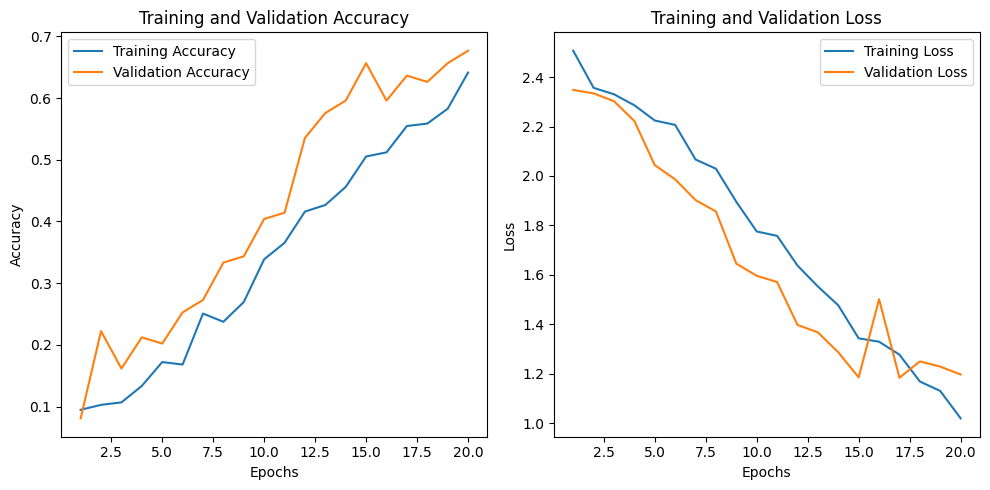

In [9]:
# Extract training and validation accuracy and loss from the 'history' object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#testing model


In [10]:
#saving model
model.save('cnn_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/cnn_model1.h5')  # Load the model saved as 'my_model.h5'

In [ ]:
# Define hyperparameters to search through
optimizers = ['adam', 'sgd']
units_options = [64, 128, 256]
dropout_rates = [0.2, 0.3, 0.4]
best_accuracy = 0.0
best_hyperparameters = {}

# Iterate through different hyperparameter combinations
for optimizer in optimizers:
    for units in units_options:
        for dropout_rate in dropout_rates:
            # Define and compile the model with the current hyperparameters
            # model = models.Sequential([
            #     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
            #     # ... (add other layers based on your original model architecture)
            #     layers.Dense(units, activation='relu'),
            #     layers.Dropout(dropout_rate),
            #     layers.Dense(11, activation='softmax')
            # ])

            model.compile(optimizer=optimizer,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            # Train the model using X_train, y_train and validate on X_val, y_val
            history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

            # Evaluate model on validation data
            _, accuracy = model.evaluate(X_val, y_val)

            # Check if current hyperparameters achieve better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters = {'optimizer': optimizer, 'units': units, 'dropout_rate': dropout_rate}

print(f"Best hyperparameters: {best_hyperparameters}")


4/4 [==============================] - 7s 2s/step - loss: 5.6806 - accuracy: 0.5758


Applying to csv data

In [7]:
path2 = '/content/drive/MyDrive/GTZAN/Data/features_30_sec.csv'
df = pd.read_csv(path2)
df.head(2)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues


In [11]:
df = df.drop('filename',axis=1)
df.head(2)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues


In [12]:
labels = df['label']

In [13]:
features = df.drop('label',axis=1)

In [14]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler object
scaler = StandardScaler()

# Fit the scaler on the training features and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Perform the same label encoding on the testing labels
y_test_encoded = label_encoder.transform(y_test)

In [18]:
print("X_train_scaled_shape: ",X_train_scaled.shape)
print("X_train_scaled_shape: ",X_test_scaled.shape)

X_train_scaled_shape:  (800, 58)
X_train_scaled_shape:  (200, 58)


In [24]:
# Normalize pixel values to be between 0 and 1
# X_train = X_train / 255.0
# X_val = X_val / 255.0
# X_test = X_test / 255.0

# image_height = 288
# image_width = 432
# num_channels = 3

# Define the CNN model
# Define your model for tabular data
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(58,)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(11, activation='softmax')  # Output layer with 11 classes (genres)
])

# model = models.Sequential()
# model.add(tf.keras.applications.VGG16(include_top=False, input_shape=(image_height, image_width, num_channels)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dense(11,activation='softmax'))



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=300, batch_size=18)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test accuracy: {test_acc}')


Epoch 1/300
45/45 [==============================] - 3s 5ms/step - loss: 3.0237 - accuracy: 0.1612
Epoch 2/300
45/45 [==============================] - 0s 5ms/step - loss: 2.3234 - accuracy: 0.2887
Epoch 3/300
45/45 [==============================] - 0s 5ms/step - loss: 1.9673 - accuracy: 0.3775
Epoch 4/300
45/45 [==============================] - 0s 5ms/step - loss: 1.7944 - accuracy: 0.4187
Epoch 5/300
45/45 [==============================] - 0s 5ms/step - loss: 1.5931 - accuracy: 0.4663
Epoch 6/300
45/45 [==============================] - 0s 5ms/step - loss: 1.5703 - accuracy: 0.4600
Epoch 7/300
45/45 [==============================] - 0s 5ms/step - loss: 1.5134 - accuracy: 0.4812
Epoch 8/300
45/45 [==============================] - 0s 4ms/step - loss: 1.4144 - accuracy: 0.5175
Epoch 9/300
45/45 [==============================] - 0s 4ms/step - loss: 1.3898 - accuracy: 0.5088
Epoch 10/300
45/45 [==============================] - 0s 5ms/step - loss: 1.3910 - accuracy: 0.5350
Epoch 11/

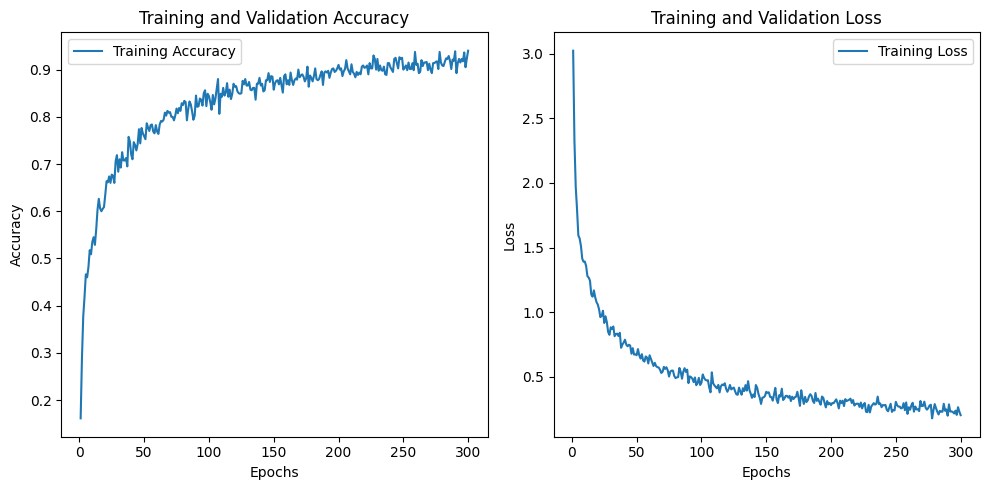

In [28]:
# Extract training and validation accuracy and loss from the 'history' object
train_acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
#plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
#plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
y_pred = model.predict(X_test_scaled)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 0s 3ms/step
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.93      1.00      0.96        13
           2       0.80      0.74      0.77        27
           3       0.70      0.67      0.68        21
           4       0.81      0.87      0.84        15
           5       0.83      0.86      0.84        22
           6       0.82      0.92      0.87        25
           7       0.71      0.77      0.74        13
           8       0.68      0.57      0.62        23
           9       0.63      0.57      0.60        21

    accuracy                           0.77       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.77      0.77      0.77       200



In [29]:
#saving model
model.save('cnn_model2_30_features.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Trying to improve the previous architecture

In [33]:
from tensorflow.keras import models, layers

# Define the model for tabular data
model = models.Sequential()

# Input layer with input shape 58
model.add(layers.Reshape((58, 1), input_shape=(58,)))

# Convolutional layers
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Flatten the output of the last convolutional layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification (adjust units based on the number of classes)
model.add(layers.Dense(11, activation='softmax'))  # Replace 'num_classes' with the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
#model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=300, batch_size=18)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test accuracy: {test_acc}')



Epoch 1/300
45/45 [==============================] - 8s 6ms/step - loss: 1.9172 - accuracy: 0.3400
Epoch 2/300
45/45 [==============================] - 0s 4ms/step - loss: 1.3833 - accuracy: 0.5063
Epoch 3/300
45/45 [==============================] - 0s 4ms/step - loss: 1.1372 - accuracy: 0.6087
Epoch 4/300
45/45 [==============================] - 0s 4ms/step - loss: 1.0091 - accuracy: 0.6438
Epoch 5/300
45/45 [==============================] - 0s 4ms/step - loss: 0.8534 - accuracy: 0.6988
Epoch 6/300
45/45 [==============================] - 0s 4ms/step - loss: 0.7684 - accuracy: 0.7312
Epoch 7/300
45/45 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.7513
Epoch 8/300
45/45 [==============================] - 0s 4ms/step - loss: 0.6121 - accuracy: 0.7825
Epoch 9/300
45/45 [==============================] - 0s 4ms/step - loss: 0.5400 - accuracy: 0.8075
Epoch 10/300
45/45 [==============================] - 0s 4ms/step - loss: 0.4272 - accuracy: 0.8675
Epoch 11/

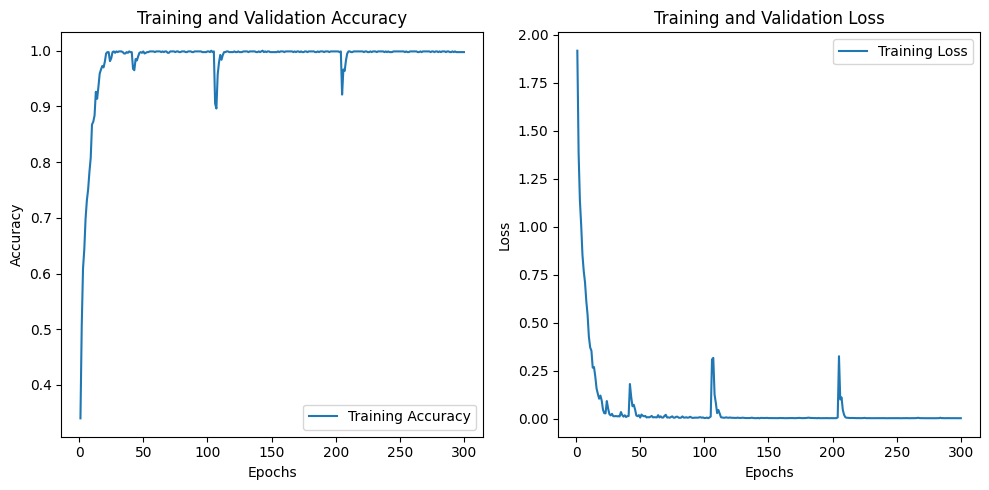

In [34]:
# Extract training and validation accuracy and loss from the 'history' object
train_acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
#plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
#plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
y_pred = model.predict(X_test_scaled)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.76      1.00      0.87        13
           2       0.66      0.70      0.68        27
           3       0.55      0.57      0.56        21
           4       0.74      0.93      0.82        15
           5       0.94      0.73      0.82        22
           6       0.88      0.92      0.90        25
           7       0.77      0.77      0.77        13
           8       0.67      0.43      0.53        23
           9       0.68      0.62      0.65        21

    accuracy                           0.73       200
   macro avg       0.73      0.75      0.73       200
weighted avg       0.73      0.73      0.72       200



In [36]:
#saving model
model.save('cnn_model3_30_features.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Applying previous models

In [45]:
# Define the CNN model
from tensorflow.keras import regularizers

# Define the model for tabular data with regularization
model = models.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(58,)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Increase the dropout rate
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Increase the dropout rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(11, activation='softmax')  # Output layer with 11 classes (genres)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=18)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test accuracy: {test_acc}')

Epoch 1/200
45/45 [==============================] - 3s 7ms/step - loss: 2.9040 - accuracy: 0.1975
Epoch 2/200
45/45 [==============================] - 0s 7ms/step - loss: 2.1373 - accuracy: 0.4013
Epoch 3/200
45/45 [==============================] - 0s 7ms/step - loss: 1.9167 - accuracy: 0.4475
Epoch 4/200
45/45 [==============================] - 0s 7ms/step - loss: 1.7409 - accuracy: 0.5100
Epoch 5/200
45/45 [==============================] - 0s 7ms/step - loss: 1.6597 - accuracy: 0.5263
Epoch 6/200
45/45 [==============================] - 0s 7ms/step - loss: 1.5564 - accuracy: 0.5700
Epoch 7/200
45/45 [==============================] - 0s 7ms/step - loss: 1.4846 - accuracy: 0.5962
Epoch 8/200
45/45 [==============================] - 0s 7ms/step - loss: 1.4614 - accuracy: 0.6087
Epoch 9/200
45/45 [==============================] - 0s 7ms/step - loss: 1.4169 - accuracy: 0.6100
Epoch 10/200
45/45 [==============================] - 0s 7ms/step - loss: 1.3738 - accuracy: 0.6363
Epoch 11/

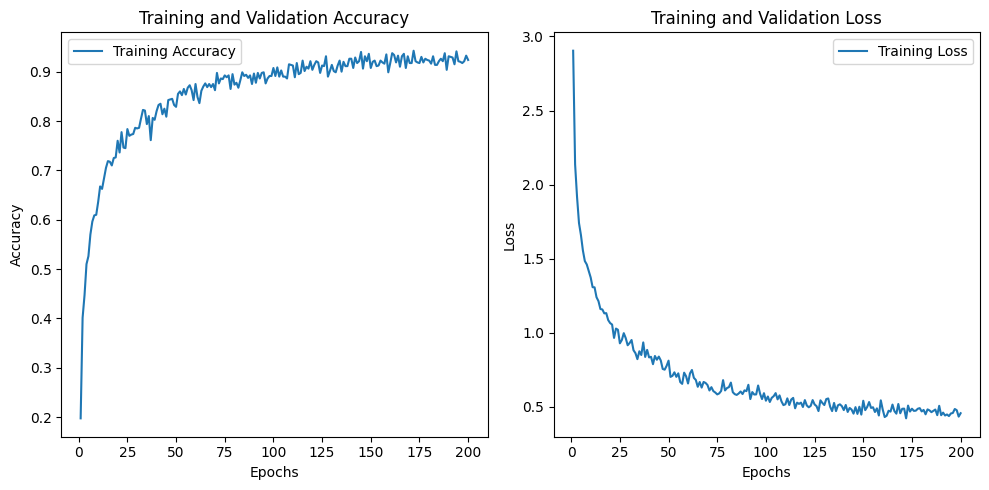

In [46]:
#plot the results
# Extract training and validation accuracy and loss from the 'history' object
train_acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
#plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
#plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#classification report

In [47]:
y_pred = model.predict(X_test_scaled)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 0s 4ms/step
Accuracy: 0.755
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.92      0.92      0.92        13
           2       0.83      0.74      0.78        27
           3       0.68      0.62      0.65        21
           4       0.71      0.80      0.75        15
           5       0.87      0.91      0.89        22
           6       0.92      0.88      0.90        25
           7       0.65      0.85      0.73        13
           8       0.61      0.48      0.54        23
           9       0.76      0.62      0.68        21

    accuracy                           0.76       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.76      0.76      0.75       200



Assesing parameter contribution


In [48]:
#saving the model
#saving model
model.save('cnn_model4_30_features.h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [39]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.1 MB/s eta 0:00:00


In [52]:
print(X_test_scaled[0])

[-0.13281673  0.68221918  0.06206651 -1.25032485 -0.71980763  0.98078152
 -0.03490142  0.32393069 -0.85110693  0.79729869 -0.55101164  1.89000915
  1.4035169   0.26095081 -0.96148576  0.68256672 -0.76989132  0.14764896
 -0.27968895 -0.88451134 -0.75078852 -0.08589822 -0.20422727 -0.69063509
  1.01595921 -1.3174486  -2.357925   -1.14383173  0.74128873 -1.18797438
 -1.74630427 -1.0358149   0.86153674 -1.3992614  -2.14446325 -1.08817109
  1.74312734 -1.0882161  -1.15241457 -1.22639405  1.32851509 -1.08763193
 -0.54619675 -1.23447165  1.31212474 -0.76866414 -0.44916815 -0.39543443
  1.93730436 -0.23995172 -0.47772314 -0.55398795  0.50806028 -0.18163872
 -0.29243335  0.06234857  0.94596436 -0.26275888]


PermutationExplainer explainer: 201it [00:13,  4.36it/s]                         


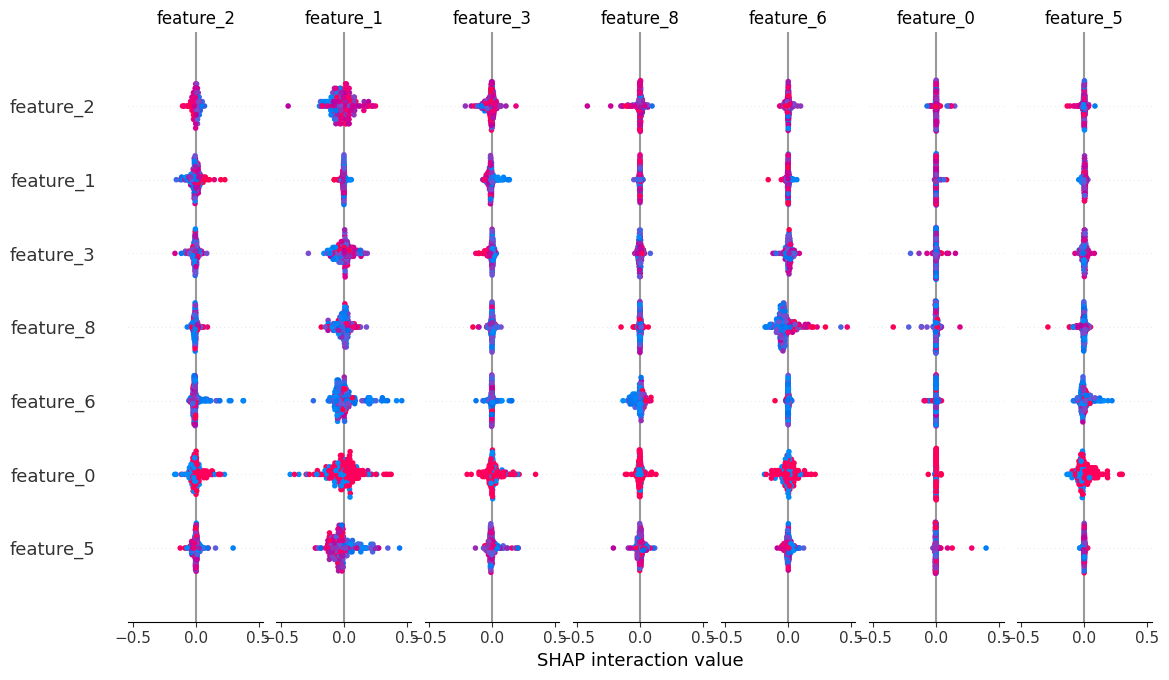

In [54]:
import shap
# Assuming 'model' is your trained model
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# # Convert the numpy array to a pandas DataFrame
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[f"feature_{i}" for i in range(X_test_scaled.shape[1])])

# Now use the DataFrame for SHAP summary plot
shap.summary_plot(shap_values.values, X_test_scaled_df, plot_type='bar')


In [56]:
# Assuming 'shap_values' contains the SHAP values from the summary plot
shap_summary_values = shap_values.values

# Get the mean absolute SHAP values for each feature
mean_abs_shap = np.mean(np.abs(shap_summary_values), axis=0)

# Filter features with positive contributions
positive_contributing_features = np.where(mean_abs_shap > 0)[0]

# Select only the columns with positive contributions from your dataset
X_train_positive_contributions = X_train_scaled[:, positive_contributing_features]
X_test_positive_contributions = X_test_scaled[:, positive_contributing_features]


In [58]:
print("X_train_positive_contributions :",X_train_positive_contributions.shape)
print("X_test_positive_contributions :",X_test_positive_contributions.shape)


X_train_positive_contributions : (800, 638)
X_test_positive_contributions : (200, 638)


In [63]:
# Define the CNN model
from tensorflow.keras import regularizers

# Define the model for tabular data with regularization
model = models.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(638,)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Increase the dropout rate
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Increase the dropout rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(11, activation='softmax')  # Output layer with 11 classes (genres)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_positive_contributions, y_train_encoded, epochs=300, batch_size=32)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_positive_contributions, y_test_encoded)
print(f'Test accuracy: {test_acc}')

Epoch 1/300
25/25 [==============================] - 5s 6ms/step - loss: 2.9130 - accuracy: 0.2400
Epoch 2/300
25/25 [==============================] - 0s 6ms/step - loss: 2.2137 - accuracy: 0.4500
Epoch 3/300
25/25 [==============================] - 0s 6ms/step - loss: 1.9777 - accuracy: 0.5138
Epoch 4/300
25/25 [==============================] - 0s 6ms/step - loss: 1.8704 - accuracy: 0.5650
Epoch 5/300
25/25 [==============================] - 0s 6ms/step - loss: 1.7654 - accuracy: 0.5900
Epoch 6/300
25/25 [==============================] - 0s 7ms/step - loss: 1.7056 - accuracy: 0.6288
Epoch 7/300
25/25 [==============================] - 0s 5ms/step - loss: 1.5975 - accuracy: 0.6525
Epoch 8/300
25/25 [==============================] - 0s 5ms/step - loss: 1.6173 - accuracy: 0.6388
Epoch 9/300
25/25 [==============================] - 0s 6ms/step - loss: 1.4815 - accuracy: 0.6775
Epoch 10/300
25/25 [==============================] - 0s 6ms/step - loss: 1.4709 - accuracy: 0.6875
Epoch 11/

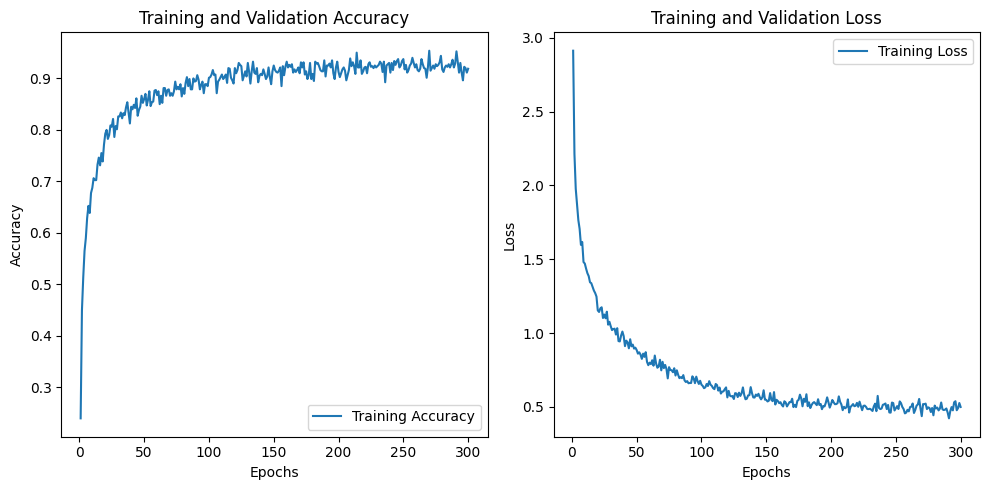

In [64]:
# Extract training and validation accuracy and loss from the 'history' object
train_acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
#plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
#plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
y_pred = model.predict(X_test_positive_contributions)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.93      1.00      0.96        13
           2       0.69      0.74      0.71        27
           3       0.74      0.67      0.70        21
           4       0.76      0.87      0.81        15
           5       0.95      0.91      0.93        22
           6       0.79      0.92      0.85        25
           7       0.83      0.77      0.80        13
           8       0.65      0.48      0.55        23
           9       0.55      0.52      0.54        21

    accuracy                           0.76       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.76      0.76      0.75       200



In [66]:
#saving the model
#saving model
model.save('cnn_model5_30_features_improved.h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
